In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Temperature-dependent Sellmeier equation for the refractive index of stoichiometric lithium tantalate.
By Bruner, et.al.

$$n_e^2(\lambda,T)=A+\frac{B+b(T)}{\lambda^2-[C+c(T)]^2}+\frac{E}{\lambda^2-F^2}+\frac{G}{\lambda^2-H^2}+D\lambda^2$$

|Coefficient|SLT|CLT|
|-----------|---|---|
|A|4.502483|4.514261|
|B|0.007294|0.011901|
|C|0.185087|0.110744|
|D|-0.02357|-0.02323|
|E|0.073423|0.076144|
|F|0.199595|0.195596|
|G|0.001||
|H|7.99724||
|b(T)|3.483933E-8(T+273.15)^2|1.82194E-8(T+273.15)^2|
|c(T)|1.607839E-8(T+273.15)^2|1.5662E-8(T+273.15)^2|

In [13]:
def slt_n2(wl,T):
    """
    Sellmeier equation for refractive index of stoichiometric lithium tantalate (SLT)
    wl: wavelength in micrometers
    T: temperature in Celsius
    returns: refractive index squared n^2
    """
    A = 4.502483
    B = 0.007294
    C = 0.185087
    D = -0.02357
    E = 0.073423
    F = 0.199595
    G = 0.001
    H = 7.99724
    b = 3.483933E-8*(T+273.15)**2
    c = 1.607839E-8*(T+273.15)**2
    return A + ((B+b)/(wl**2 - (C+c)**2)) + (E/(wl**2 - F**2)) + (G/(wl**2 - H**2)) + D*wl**2

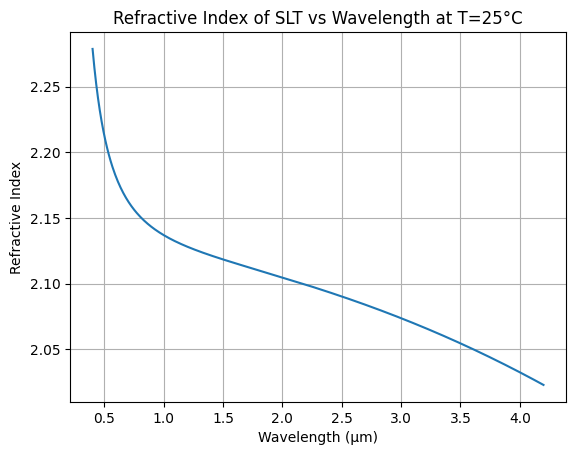

In [15]:
wl = np.linspace(0.4, 4.2, 500)  # wavelength range from 0.4 to 4.2 micrometers
T = 25  # temperature in Celsius
n2_values = slt_n2(wl, T)
n_values = np.sqrt(n2_values)
plt.plot(wl, n_values)
plt.title('Refractive Index of SLT vs Wavelength at T={}°C'.format(T))
plt.xlabel('Wavelength (μm)')
plt.ylabel('Refractive Index')
plt.grid()
plt.show()

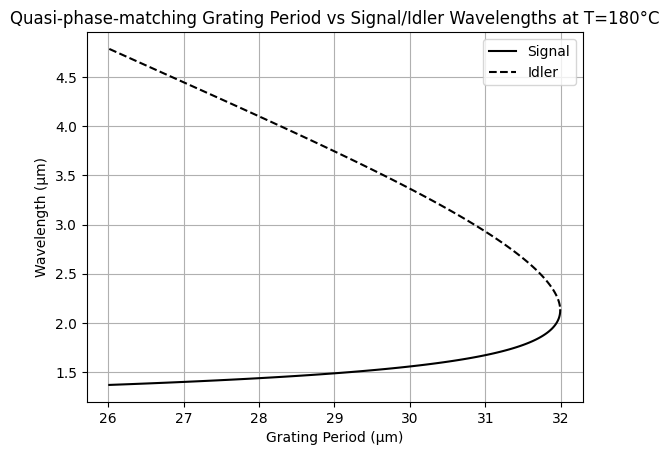

In [28]:
wl_p = 1.064 # pump wavelength in micrometers
T = 180 # temperature in Celsius
n_p = np.sqrt(slt_n2(wl_p, T))
wl_s = np.linspace(1.368,2*wl_p,100) # signal wavelength in micrometers
n_s = np.sqrt(slt_n2(wl_s, T))
wl_i = 1/(1/wl_p - 1/wl_s) # idler wavelength in micrometers
n_i = np.sqrt(slt_n2(wl_i, T))
grat_period = 1/(n_p/wl_p - n_s/wl_s - n_i/wl_i)
plt.plot(grat_period,wl_s,'-k', label='Signal')
plt.plot(grat_period,wl_i,'--k' , label='Idler')
plt.title('Quasi-phase-matching Grating Period vs Signal/Idler Wavelengths at T={}°C'.format(T))
plt.xlabel('Grating Period (μm)')
plt.ylabel('Wavelength (μm)')
plt.legend()
plt.grid()
plt.show()

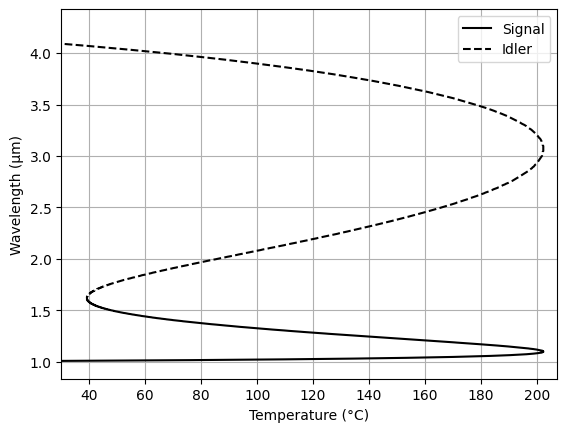

In [74]:
wl_p = 0.810 # pump wavelength in micrometers
wl_s = np.linspace(1.0,2*wl_p,500) # signal wavelength in micrometers
wl_i = 1/(1/wl_p - 1/wl_s) # idler wavelength in micrometers
grat_period = 23 # in micrometers

T_arr = []
for i in range(len(wl_s)):
    T = np.linspace(25,250,1000) # temperature in Celsius
    n_p = np.sqrt(slt_n2(wl_p, T))
    n_s = np.sqrt(slt_n2(wl_s[i], T))
    n_i = np.sqrt(slt_n2(wl_i[i], T))
    delta_k = 2*np.pi*(n_p/wl_p - n_s/wl_s[i] - n_i/wl_i[i] - 1/grat_period)
    t_at_zero = T[np.argmin(np.abs(delta_k))]
    T_arr.append(t_at_zero)


plt.plot(T_arr,wl_s,'-k', label='Signal')
plt.plot(T_arr,wl_i,'--k' , label='Idler')
#plt.title('Quasi-phase-matching Grating Period vs Signal/Idler Wavelengths at T={}°C'.format(T))
plt.xlabel('Temperature (°C)')
plt.ylabel('Wavelength (μm)')
plt.xlim([np.min(T_arr)+5, np.max(T_arr)+5])
plt.legend()
plt.grid()
plt.show()